In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
import math
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from IPython.display import display
from openpyxl.styles import numbers

In [59]:
combined_sales = pd.read_csv('/Users/zhengyaojin/Desktop/Cooper/Combined Cleaned Sales Data.csv')

In [60]:
# Convert the datetime
combined_sales['Invoice Date'] = pd.to_datetime(combined_sales['Invoice Date'])

In [61]:
# Only use last year's data
filtered_sales = combined_sales[(combined_sales['Invoice Date'] >= '2023-01-01') & (combined_sales['Invoice Date'] <= '2023-12-31')]

In [62]:
filtered_sales.columns

Index(['Invoice Accounting Period', 'Invoice Date', 'Invoice Number', 'Branch',
       'Product Number', 'Product Description', 'Product Buy Line',
       'Product Quantity Shipped', 'Product Net Price', 'Product Net Cost',
       'Invoice Line Extension', 'Product Extended Cost',
       'Product Extended GL Cost', 'Customer Number', 'Customer Name',
       'Product C1 Standard Extended Cost', 'Product Rebate Extended Cost',
       'Product Line Number', 'Product Line Description',
       'Contract Price Method', 'Product Price Method',
       'Price Override Description', 'Concate', 'Unique ID'],
      dtype='object')

In [63]:
filtered_sales

,Invoice Accounting Period,Invoice Date,Invoice Number,Branch,Product Number,Product Description,Product Buy Line,Product Quantity Shipped,Product Net Price,Product Net Cost,...,Customer Name,Product C1 Standard Extended Cost,Product Rebate Extended Cost,Product Line Number,Product Line Description,Contract Price Method,Product Price Method,Price Override Description,Concate,Unique ID
1,823,2023-08-01,CH011731,50,H-4050-08,EASY SEAL DIRECT INJECT,SUPPLIES-H,1.0,63.6768,47.5200,...,SOUTHEAST AIR SYSTEMS ** /C,47.52,0.0,1.0,CHEMICALS/CLEANERS,NaN,List Price Used !,NaN,CH011731H-4050-0850,2
2,223,2023-02-28,PT17842,10,5-429030,"PVC, 3 in, Coupling",SUPPLIES,3.0,4.1300,3.1132,...,POLAR BEAR JACK'S HTG & AIR,9.34,0.0,3.0,PVC & CPVC,VDQTULNC-S,C#VDQTULNC-S\Product Net Price,NaN,PT178425-42903010,3
5,523,2023-05-30,L094976,11,78903,Paint Brush - Mars,SUPPLIES,2.0,0.7700,0.6930,...,MOONLIT HEATING & AC,1.39,0.0,45.0,PAINT BRUSH,0005743-2S,C#0005743-2S\Product Net Price,NaN,L0949767890311,6
7,623,2023-06-27,Y046986A,16,447-7,"PVC, 3/4 in, Cap Slip",SUPPLIES,0.0,0.3200,0.2654,...,C DAVIS HEATING & AC,0.00,0.0,7.0,PVC & CPVC,NaN,Cust Catg (L2 - 0.00%),NaN,Y046986A447-716,8
8,1223,2023-12-12,PT20324,10,MFSCR66W4,4-Way Sidewall/Ceiling,SUPPLIES,0.0,5.4800,3.9400,...,KELCH'S TOTAL COMFORT LLC,0.00,0.0,30.0,METALFAB SIDEWALL/CEILING GRIL,NaN,Cust Catg (C6 - 0.00%),NaN,PT20324MFSCR66W410,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048566,323,2023-03-16,T098161,10,MOT19412,"MOTOR, 1/3 HP, 200/230/60/1,",PARTS (OEM,1.0,486.0200,315.8100,...,AIR ASSURANCE CO.,315.81,0.0,1.0,AMSTD PARTS TOP,NaN,Override,NaN,T098161MOT1941210,1048567
1048568,923,2023-09-21,HU007274,52,H-031-6,"FLEX DUCT 6"" X 25' ATCO 031 -",SUPPLIES-H,3.0,48.1900,37.5800,...,BAMA AIR SYSTEMS MECH CONT **H,112.74,0.0,7.0,FLEX DUCT,NaN,Cust Catg (L2 - 0.00%),NaN,HU007274H-031-652,1048569
1048569,123,2023-01-25,C147406,3,PL-20241,"Pleated Filter, 20 in x 24 in",SUPPLIES,1.0,7.4000,4.8800,...,AMERICAN MECHANICAL,4.88,0.0,4.0,PLEATED FILTERS,NaN,Cust Catg (C7 + 0.00%),NaN,C147406PL-202413,1048570
1048570,523,2023-05-08,T099855,10,821,"3"" FSK FOIL TAPE",SUPPLIES,1.0,13.9600,10.7500,...,ELITE SERVICE COMPANY,10.75,0.0,2.0,TAPE,NaN,Cust Catg (C7 + 0.00%),NaN,T09985582110,1048571


In [64]:
# Listing the unique values in the 'Product Buy Line' column
unique_values = filtered_sales['Product Buy Line'].unique()

# Printing the unique values
for value in unique_values:
    print(value)

SUPPLIES-H
SUPPLIES
PARTS (OEM
SAMSUNG
ASRES
OXBOXRES-H
3RD PARTY
AMERISTAR
ASCOM
OTH EQUIP
ADMIN-H
nan
OEMPART-H
NRDRES-H
VRF/DVMS
MITSU-H
SCREW; PHILLIPS HEAD, 6-32 X
OBSPROD-H
OBSOLETE
H000
H406
REPL,THERMISTOR,SENSOR,DISCH
OTH EQUIP-
FILTER; 25 X 24 X 1IN.,
HV86
H225
HOXP
MOTOR,PROG,VS,MB6,B,
HMIT
GEO
AS DUCTLES
EXCHANGER; HEAT EXCHANGER W /
REPL,GASKET,INDUCER,80
CABLE; W/PLUG ASSEMBLY, 4
REPL,BLWR.CNTL,VSHE,R6GI
DOOR; BLOWER, 19.11 X 20.15,
WAR
DUCTLESS
REPL,MTR,DM2X,PROG,1
REPL,CNTRL,FURNACE,MH
ASSY-BLDC


In [65]:
type_df = filtered_sales.copy()

total_sales_type = type_df.groupby('Product Buy Line').agg(
    Total_Dollar = ('Invoice Line Extension', 'sum'),
    Total_Order = ('Product Buy Line', 'size'),
    Mean_Dollar = ('Invoice Line Extension', 'mean')
    ).reset_index()

sorted_total_sales_type = total_sales_type.sort_values(by='Total_Dollar', ascending=False)

total_revenue = sorted_total_sales_type['Total_Dollar'].sum()

total_order = sorted_total_sales_type['Total_Order'].sum()

sorted_total_sales_type['Type Contribution Revenue %'] = (sorted_total_sales_type['Total_Dollar'] / total_revenue) * 100

sorted_total_sales_type['Type Contribution Frequency %'] = (sorted_total_sales_type['Total_Order'] / total_order) * 100

sorted_total_sales_type

,Product Buy Line,Total_Dollar,Total_Order,Mean_Dollar,Type Contribution Revenue %,Type Contribution Frequency %
5,ASRES,82681422.36,83831,986.286963,52.309902,16.120013
36,SUPPLIES,20284839.53,270302,75.045096,12.833572,51.976856
4,ASCOM,14869621.54,7395,2010.766943,9.407536,1.421998
2,AMERISTAR,11809056.87,13844,853.009020,7.471214,2.662088
21,NRDRES-H,6819505.25,7712,884.271946,4.314484,1.482954
28,PARTS (OEM,5690763.68,45546,124.945411,3.600365,8.758122
34,SAMSUNG,5403820.86,8339,648.017851,3.418825,1.603521
37,SUPPLIES-H,4995464.89,67241,74.291948,3.160472,12.929892
19,MITSU-H,1739456.37,2254,771.719774,1.100499,0.433426
38,VRF/DVMS,1360029.87,1186,1146.736821,0.860448,0.228058


**Assumption & For Future Reference**: We need to look at supplies and equipments separately. For now, simply eliminate the product line 'supply' and product lines that make up less than 0.1% of total sales dollars. 

In [66]:
# Filter these product lines from the entire dataframe
No_need_product_lines = ['OBSOLETE', 'CABLE; W/PLUG ASSEMBLY, 4', 'REPL,GASKET,INDUCER,80', 'SCREW; PHILLIPS HEAD, 6-32 X',
                        'AS DUCTLES', 'FILTER; 25 X 24 X 1IN.,', 'REPL,THERMISTOR,SENSOR,DISCH', 'WAR', 'DOOR; BLOWER, 19.11 X 20.15,',
                        'REPL,CNTRL,FURNACE,MH', 'ASSY-BLDC', 'HOXP', 'REPL,BLWR.CNTL,VSHE,R6GI', 'DUCTLESS', 'HV86', 'GEO', 'REPL,MTR,DM2X,PROG,1',
                        'H000', 'H225', 'MOTOR,PROG,VS,MB6,B,', 'EXCHANGER; HEAT EXCHANGER W /', 'HMIT', 'OBSPROD-H', 'ADMIN-H', 
                        'H406', 'OTH EQUIP', 'SUPPLIES', 'SUPPLIES-H']

# Filter out the rows and creates a new dataframe filtered_sales
filtered_sales = filtered_sales[~filtered_sales['Product Buy Line'].isin(No_need_product_lines)]

# Listing the unique values in the 'Product Buy Line' column
#unique_values = filtered_sales['Product Buy Line'].unique()

# Printing the unique values
#for value in unique_values:
#    print(value)

**Assumption & For Future Reference**: We need to look at return orders, which could be those orders that have negative quantity shipped and negative sales dollars. For now, simply eliminate these orders for simplicity. 

In [67]:
filtered_sales = filtered_sales[filtered_sales['Invoice Line Extension'] >= 0]
filtered_sales = filtered_sales[filtered_sales['Product Quantity Shipped'] >= 0]

**Assumption & For Future Reference**: For the purpose of avoiding NaN in calculating Stdev and safety stock  we need to eliminate product items that has only one order in 2023. These products are likely not important because there are no recurring orders.

In [68]:
order_num = filtered_sales.groupby('Product Number').size().reset_index(name='Order Count')
order_num = order_num[order_num['Order Count'] > 1]
filtered_sales = filtered_sales[filtered_sales['Product Number'].isin(order_num['Product Number'])]


**Assumption & For Future Reference**: To ensure the calculation of standard deviation is consistent with the timeframe of lead time, which is in days, we need to create a new dataframe that has every single date in 2023.

In [69]:
# Generate a date range for every day in 2023
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Create a DataFrame with the date range
date_df = pd.DataFrame(date_range, columns=['Date'])

date_df

,Date
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
...,...
360,2023-12-27
361,2023-12-28
362,2023-12-29
363,2023-12-30


In [70]:
# Group by 'Product Number' and 'Invoice Date' and sum the 'Product Quantity Shipped'
grouped_sales = filtered_sales.groupby(['Product Number', 'Invoice Date'])['Product Quantity Shipped'].sum().reset_index()

# Merge with date_df to ensure all dates are represented
# We will create a DataFrame for each product and merge with the respective date
result_dfs = []
for product_number in grouped_sales['Product Number'].unique():
    # Filter for the current product
    product_sales = grouped_sales[grouped_sales['Product Number'] == product_number]
    
    # Merge with date_df
    merged_df = pd.merge(date_df, product_sales, left_on='Date', right_on='Invoice Date', how='left')
    
    # Fill NaN values with 0 and drop 'Invoice Date' column
    merged_df['Product Quantity Shipped'] = merged_df['Product Quantity Shipped'].fillna(0)
    merged_df = merged_df.drop(columns=['Invoice Date'])
    
    # Add 'Product Number' column
    merged_df['Product Number'] = product_number
    
    # Append to the list of result DataFrames
    result_dfs.append(merged_df)

# Concatenate all result DataFrames
final_date_df = pd.concat(result_dfs)

# Reset index
final_date_df = final_date_df.reset_index(drop=True)

final_date_df

,Date,Product Number,Product Quantity Shipped
0,2023-01-01,0131F00042SP,0.0
1,2023-01-02,0131F00042SP,0.0
2,2023-01-03,0131F00042SP,0.0
3,2023-01-04,0131F00042SP,0.0
4,2023-01-05,0131F00042SP,0.0
...,...,...,...
1491385,2023-12-27,val09478,0.0
1491386,2023-12-28,val09478,0.0
1491387,2023-12-29,val09478,0.0
1491388,2023-12-30,val09478,0.0


In [71]:
# Group by 'Product Number' and calculate daily mean and daily standard deviation
statistics_df_date = final_date_df.groupby('Product Number')['Product Quantity Shipped'].agg(['mean', 'std']).reset_index()

statistics_df_date.columns = ['Product Number', 'Daily Mean', 'Daily Standard Deviation']

statistics_df_date

,Product Number,Daily Mean,Daily Standard Deviation
0,0131F00042SP,0.041096,0.584562
1,067L5958,0.000000,0.000000
2,1/2x50i,0.021918,0.304836
3,1006801R,0.032877,0.193333
4,1009905R,0.005479,0.073922
...,...,...,...
4081,kit17852,0.005479,0.073922
4082,mot09804,0.008219,0.116912
4083,pnl31433,0.008219,0.090410
4084,val06383,0.005479,0.073922


## ABC Inventory Classification

### COOP-1377: https://cooperai.atlassian.net/browse/COOP-1377
### COOP-1378: https://cooperai.atlassian.net/browse/COOP-1378

**Assumptions**

A: 70% of sales

B: 20% of sales

C: 10% of sales

In [72]:
# Assumption
threshold_A = 70
threshold_B = 20
threshold_C = 100 - threshold_A - threshold_B

In [73]:
# Create a copy of the filtered_sales to preserve the originality of filtered_sales
sales_abc_clean = filtered_sales

In [74]:
# Remove negative revenue from the dataframe
#sales_abc_clean = sales_abc[sales_abc['Invoice Line Extension'] >= 0]
sales_abc_clean.shape[0]

162255

In [75]:
grouped_clean = sales_abc_clean.groupby('Product Number')

# Sum the 'Total Sales' for each group
total_sales_sum = grouped_clean['Invoice Line Extension'].sum().reset_index()

# Rename the 'Invoice Line Extension' column to 'Revenue' 
total_sales_sum = total_sales_sum.rename(columns={'Invoice Line Extension': 'Revenue'})

# Sort the total sales from highest to lowest
sorted_total_sales_sum = total_sales_sum.sort_values(by='Revenue', ascending=False)

# Calculate the importance based on Revenue to decide A, B, and C. 
total_revenue = sorted_total_sales_sum['Revenue'].sum()
sorted_total_sales_sum['Revenue Importance'] = (sorted_total_sales_sum['Revenue'] / total_revenue)*100

sorted_total_sales_sum.head()

,Product Number,Revenue,Revenue Importance
114,4A7A4048N1000A,3817519.86,2.630150
116,4A7A4060N1000A,3769929.34,2.597361
111,4A7A4036N1000A,3598714.82,2.479400
220,4TXCC009DS3HCA,2488990.69,1.714835
216,4TXCB006DS3HCA,2024966.92,1.395138


In [76]:
sorted_total_sales_sum.shape[0]

4086

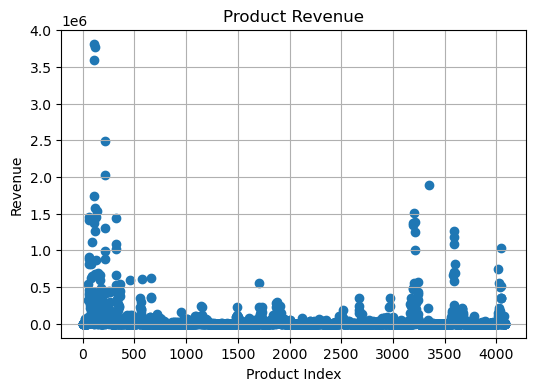

In [77]:
# Plot the 'Cumulative Val' column as a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(sorted_total_sales_sum.index, sorted_total_sales_sum['Revenue'], marker='o')
plt.title('Product Revenue')
plt.xlabel('Product Index')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [78]:
sorted_total_filtered = sorted_total_sales_sum

In [79]:
sorted_total_filtered.shape[0]

4086

In [80]:
sorted_total_filtered

,Product Number,Revenue,Revenue Importance
114,4A7A4048N1000A,3817519.86,2.630150
116,4A7A4060N1000A,3769929.34,2.597361
111,4A7A4036N1000A,3598714.82,2.479400
220,4TXCC009DS3HCA,2488990.69,1.714835
216,4TXCB006DS3HCA,2024966.92,1.395138
...,...,...,...
3947,WHL02167,0.00,0.000000
446,AC16-D0031,0.00,0.000000
445,AC16-D0025,0.00,0.000000
444,AC16-D0024,0.00,0.000000


In [81]:
# Assumption
threshold_A = 70
threshold_B = 20
threshold_C = 100 - threshold_A - threshold_B

# Initialize categories and cumulative sum
category_A = []
category_B = []
category_C = []
cum_sum = 0

# Variables to store the cutoff points
cutoff_A = None
cutoff_B = None

# Categorize items
for i in range(sorted_total_filtered.shape[0]):
    cum_sum += sorted_total_filtered.iloc[i]['Revenue Importance']
    if cum_sum <= threshold_A:
        category_A.append(sorted_total_filtered.iloc[i]['Product Number'])
    elif cum_sum <= threshold_A + threshold_B:
        if cutoff_A is None:
            cutoff_A = sorted_total_filtered.iloc[i]['Revenue Importance']  
        category_B.append(sorted_total_filtered.iloc[i]['Product Number'])
    else:
        if cutoff_B is None:
            cutoff_B = sorted_total_filtered.iloc[i]['Revenue Importance']  
        category_C.append(sorted_total_filtered.iloc[i]['Product Number'])

# Record the final cutoff points if they were not already recorded
if cutoff_A is None:
    cutoff_A = len(sorted_total_filtered)
if cutoff_B is None:
    cutoff_B = len(sorted_total_filtered)

# Print or store the cutoff points
print(f"Cutoff point for threshold_A (70%): {cutoff_A}")
print(f"Cutoff point for threshold_B (90%): {cutoff_B}")
        

A_number = len(category_A)
A_percentage = round((len(category_A) / sorted_total_filtered.shape[0]) * 100, 3)

B_number = len(category_B)
B_percentage = round((len(category_B) / sorted_total_filtered.shape[0]) * 100, 3)

C_number = len(category_C)
C_percentage = round((len(category_C) / sorted_total_filtered.shape[0]) * 100, 3)

Cutoff point for threshold_A (70%): 0.13901071878398993
Cutoff point for threshold_B (90%): 0.022730990467082567


In [82]:
cutoff_C = sorted_total_filtered.iloc[sorted_total_filtered.shape[0]-1]['Revenue Importance']
cutoff_C

0.0

In [83]:
print(f'Number of items in Category A: {A_number}, which accounts for {threshold_A}% of total revenue and {A_percentage}% of total items')
print(f'Number of items in Category B: {B_number}, which accounts for {threshold_B}% of total revenue and {B_percentage}% of total items')
print(f'Number of items in Category C: {C_number}, which accounts for {threshold_C}% of total revenue and {C_percentage}% of total items')

Number of items in Category A: 156, which accounts for 70% of total revenue and 3.818% of total items
Number of items in Category B: 365, which accounts for 20% of total revenue and 8.933% of total items
Number of items in Category C: 3565, which accounts for 10% of total revenue and 87.249% of total items


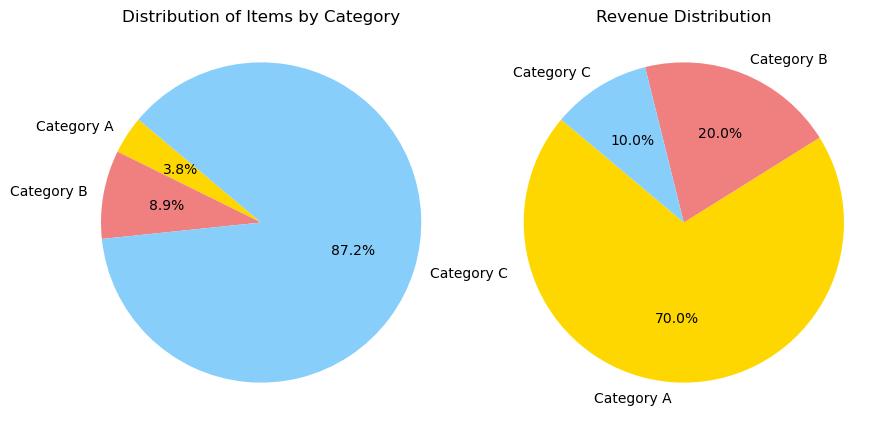

In [84]:
# Visualize with a pie chart
labels = ['Category A', 'Category B', 'Category C']
sizes = [A_percentage, B_percentage, C_percentage]
threshold_sizes = [threshold_A, threshold_B, threshold_C]
colors = ['gold', 'lightcoral', 'lightskyblue']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First pie chart: Distribution of Items by Category
axs[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].axis('equal') 
axs[0].set_title('Distribution of Items by Category')

# Second pie chart: Threshold Distribution
axs[1].pie(threshold_sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].axis('equal')  
axs[1].set_title('Revenue Distribution')

plt.show()

## XYZ Inventory Classification 

Use frequency of order

In [85]:
X_set_th = 0.2
Y_set_th = 0.2
Z_set_th = 1 - X_set_th - Y_set_th

In [86]:
# Implement XYZ policy
# Create a copy of the filtered_sales to preserve the originality of filtered_sales
sales_xyz = filtered_sales

In [87]:
# Remove negative product from the dataframe
#sales_xyz_clean = sales_xyz[sales_xyz['Product Quantity Shipped'] >= 0]
sales_xyz_clean = sales_xyz
sales_xyz_clean.shape[0]

162255

In [88]:
# Group the sales data by 'Product Number' and count the number of orders for each product
order_count_df = sales_xyz_clean.groupby('Product Number').size().reset_index(name='Order Count')

# Sort the orders from highest to lowest
order_count_df_sort = order_count_df.sort_values(by='Order Count', ascending=False)

order_count_df_sort

,Product Number,Order Count
665,BAYHTR1517BRKA,3809
220,4TXCC009DS3HCA,3583
216,4TXCB006DS3HCA,3492
663,BAYHTR1510BRKA,3042
214,4TXCB003DS3HCA,2610
...,...,...
1426,DB96-17288A,2
1428,DB96-17640A,2
3141,RLY1388,2
3140,RLY1357,2


**For XYZ classification, we assume 20% of item falls into X_category(Most Frequent), the next 20% falls into Y_category(Less Frequent), and the last 60% of item falls into Z_category(Not Frequent). The assumption is subject to change**. 

In [89]:
# Calculate the total number of products
total_products = len(order_count_df_sort)

# Determine the number of products for each category
num_X = int(total_products * 0.20)
num_Y = int(total_products * 0.20)
num_Z = total_products - num_X - num_Y

# Identify the thresholds for each category
threshold_X = order_count_df_sort.iloc[num_X - 1]['Order Count'] if num_X > 0 else 0
threshold_Y = order_count_df_sort.iloc[num_X + num_Y - 1]['Order Count'] if num_Y > 0 else 0

print(f"Threshold for X category: {threshold_X}")
print(f"Threshold for Y category: {threshold_Y}")

Threshold for X category: 26
Threshold for Y category: 9


In [90]:
cutoff_X = threshold_X
cutoff_Y = threshold_Y
threshold_Z = order_count_df_sort.iloc[order_count_df_sort.shape[0]-1]['Order Count']
cutoff_Z = threshold_Z
cutoff_Z 
 

2

In [91]:
# Use the threshold calculated
X_threshold = threshold_X  
Y_threshold = threshold_Y 

In [92]:
# Initialize categories
category_X = []
category_Y = []
category_Z = []

# Classify products based on order counts
for _, row in order_count_df_sort.iterrows():
    if row['Order Count'] >= X_threshold:
        category_X.append(row['Product Number'])
    elif row['Order Count'] >= Y_threshold and row['Order Count'] < X_threshold:
        category_Y.append(row['Product Number'])
    else:
        category_Z.append(row['Product Number'])

In [93]:
# Calculate the percentage of products in each category
total_products = len(order_count_df_sort)
x_percentage = len(category_X) / total_products * 100
y_percentage = len(category_Y) / total_products * 100
z_percentage = len(category_Z) / total_products * 100

print(f'Number of items in Category X: {len(category_X)}, which accounts for {x_percentage}% of total items')
print(f'Number of items in Category Y: {len(category_Y)}, which accounts for {y_percentage}% of total items')
print(f'Number of items in Category Z: {len(category_Z)}, which accounts for {z_percentage}% of total items')

Number of items in Category X: 826, which accounts for 20.215369554576604% of total items
Number of items in Category Y: 834, which accounts for 20.411160058737153% of total items
Number of items in Category Z: 2426, which accounts for 59.37347038668624% of total items


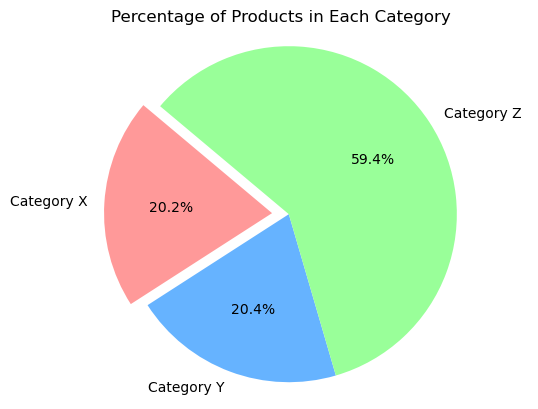

In [94]:
# Create a pie chart
labels = 'Category X', 'Category Y', 'Category Z'
sizes = [x_percentage, y_percentage, z_percentage]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

ax1.axis('equal')  

plt.title('Percentage of Products in Each Category')
plt.show()

## ABC-XYZ Classification

In [95]:
set_A = set(category_A)
set_B = set(category_B)
set_C = set(category_C)
set_X = set(category_X)
set_Y = set(category_Y)
set_Z = set(category_Z)

# Combined categories
category_AX = list(set_A & set_X)
category_AY = list(set_A & set_Y)
category_AZ = list(set_A & set_Z)
category_BX = list(set_B & set_X)
category_BY = list(set_B & set_Y)
category_BZ = list(set_B & set_Z)
category_CX = list(set_C & set_X)
category_CY = list(set_C & set_Y)
category_CZ = list(set_C & set_Z)

In [96]:
product_numbers_sorted = set(sorted_total_filtered['Product Number'])
product_numbers_demand = set(order_count_df_sort['Product Number'])

common_product_numbers = product_numbers_sorted & product_numbers_demand

# Count the number of common product numbers. That is the total products that we care about after filtering. 
count_common_product_numbers = len(common_product_numbers)

total_len = count_common_product_numbers

len_AX = len(category_AX)
len_AY = len(category_AY)
len_AZ = len(category_AZ)
len_BX = len(category_BX)
len_BY = len(category_BY)
len_BZ = len(category_BZ)
len_CX = len(category_CX)
len_CY = len(category_CY)
len_CZ = len(category_CZ)

category_lengths = {
    'AX': len_AX,
    'AY': len_AY,
    'AZ': len_AZ,
    'BX': len_BX,
    'BY': len_BY,
    'BZ': len_BZ,
    'CX': len_CX,
    'CY': len_CY,
    'CZ': len_CZ
}

# Print the results using the specified format
for category, length in category_lengths.items():
    print(f'Number of items in Category {category} is {length}, which accounts for {length / total_len * 100:.2f}% of total items')

Number of items in Category AX is 153, which accounts for 3.74% of total items
Number of items in Category AY is 2, which accounts for 0.05% of total items
Number of items in Category AZ is 1, which accounts for 0.02% of total items
Number of items in Category BX is 259, which accounts for 6.34% of total items
Number of items in Category BY is 85, which accounts for 2.08% of total items
Number of items in Category BZ is 21, which accounts for 0.51% of total items
Number of items in Category CX is 414, which accounts for 10.13% of total items
Number of items in Category CY is 747, which accounts for 18.28% of total items
Number of items in Category CZ is 2404, which accounts for 58.84% of total items


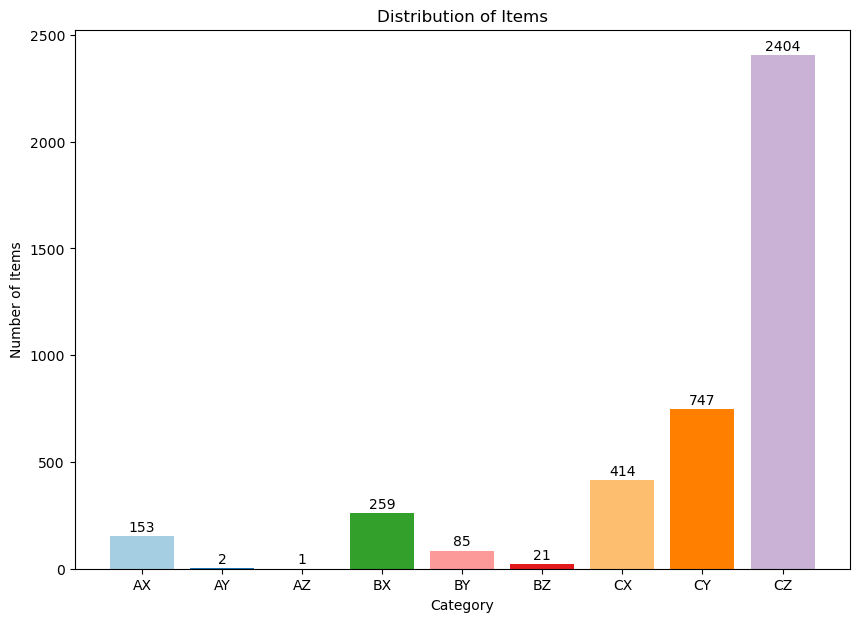

In [97]:
# Create a bar chart for visualization
labels = list(category_lengths.keys())
sizes = list(category_lengths.values())

plt.figure(figsize=(10, 7))
plt.bar(labels, sizes, color=plt.cm.Paired.colors)
plt.xlabel('Category')
plt.ylabel('Number of Items')
plt.title('Distribution of Items')

for i, v in enumerate(sizes):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')
    
plt.show()

### COOP-1380: https://cooperai.atlassian.net/browse/COOP-1380

## Safety Stock Calculation with      $ \text{Safety Stock} = Z \times \sigma_d \times \sqrt{L} $

**Understanding Standard Deviation in Safety Stock Calculation**

Standard Deviation of Demand ($\sigma_d$): This measures the variability in the number of items demanded over a period. It's expressed in the same units as the demand (i.e., number of items).

Service Level and Z-score: The desired service level determines the Z-score, which represents the number of standard deviations from the mean demand to achieve that service level. For example, a 95% service level corresponds to a Z-score of approximately 1.65.

Example
Suppose you want a 95% service level, and the standard deviation of demand ($\sigma_d$) is 100 items:

The Z-score for a 95% service level is approximately 1.65.
Safety Stock = 1.65 * 100 items = 165 items.




**In inventory management, service level refers to the probability that the inventory available during a replenishment cycle will meet customer demand. It's a measure of performance that indicates the ability of a company to fulfill customer orders without facing stockouts. Service level can be calculated using statistical methods that account for demand variability and lead times. For example, if a company aims for a 95% cycle service level, it means there is a 95% chance that inventory will not run out during the replenishment cycle.**

In [98]:
# Define the assumption for each box. This assumption should change based on business scenarios. 

Service_Levels = {
    'AX': 0.95,
    'AY': 0.90,
    'AZ': 0.85,
    'BX': 0.80,
    'BY': 0.75,
    'BZ': 0.70,
    'CX': 0.65,
    'CY': 0.60,
    'CZ': 0.55
}

In [99]:
# Convert service levels to Z-scores
Z_scores = {key: stats.norm.ppf(value) for key, value in Service_Levels.items()}
Z_scores

{'AX': 1.6448536269514722,
 'AY': 1.2815515655446004,
 'AZ': 1.0364333894937898,
 'BX': 0.8416212335729143,
 'BY': 0.6744897501960817,
 'BZ': 0.5244005127080407,
 'CX': 0.38532046640756773,
 'CY': 0.2533471031357997,
 'CZ': 0.12566134685507416}

In [100]:
# Create a copy of the filtered_sales to preserve the originality of filtered_sales
sales_abc_xyz = filtered_sales

# Group the sales data by 'Product Number'
grouped_abcxyz = sales_abc_xyz.groupby('Product Number').agg(
    Product_Name=('Product Description', 'first'),
    Product_Line=('Product Buy Line', 'first'),
    Unit_Price=('Product Net Price', 'mean'),
    Unit_Cost=('Product Net Cost', 'mean'),
    Total_Dollar_Amount=('Invoice Line Extension', 'sum'),
    Total_Units=('Product Quantity Shipped', 'sum'),
    Frequency=('Product Number', 'size'),
    Min_Quantity_Shipped=('Product Quantity Shipped', 'min'),
    Max_Quantity_Shipped=('Product Quantity Shipped', 'max'),
).reset_index()


# Merge the DataFrame statistics_df_date, which contains daily std and daily mean, 
# with grouped_abcxyz on 'Product Number'
grouped_abcxyz = pd.merge(grouped_abcxyz, statistics_df_date, on='Product Number', how='left')

grouped_abcxyz

,Product Number,Product_Name,Product_Line,Unit_Price,Unit_Cost,Total_Dollar_Amount,Total_Units,Frequency,Min_Quantity_Shipped,Max_Quantity_Shipped,Daily Mean,Daily Standard Deviation
0,0131F00042SP,BLW MTR PSC 1/2HP 1130RPM 115V,None,184.793500,128.115000,2729.65,15.0,2,5.0,10.0,0.041096,0.584562
1,067L5958,"Danfoss 3/8""ODF x 1/2""ODF with",3RD PARTY,128.455533,77.073333,0.00,0.0,3,0.0,0.0,0.000000,0.000000
2,1/2x50i,"1/2x50 rolled copper, Import",None,52.166267,43.379800,416.96,8.0,3,0.0,5.0,0.021918,0.304836
3,1006801R,Control Board,3RD PARTY,144.782071,93.987143,1839.75,12.0,14,0.0,2.0,0.032877,0.193333
4,1009905R,COND COIL,None,1064.375000,687.750000,2128.75,2.0,2,1.0,1.0,0.005479,0.073922
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,kit17852,kit17852 KIT; HOT SURFACE,PARTS (OEM,129.139100,80.535000,258.28,2.0,2,1.0,1.0,0.005479,0.073922
4082,mot09804,.75 hp 460/60/3 950/1125,PARTS (OEM,1363.061333,917.860000,4089.19,3.0,3,1.0,1.0,0.008219,0.116912
4083,pnl31433,PANEL; BLOWER ACCESS,PARTS (OEM,156.599240,96.535920,383.70,3.0,5,0.0,1.0,0.008219,0.090410
4084,val06383,"VAL06383 VALVE; EXPANSION,",PARTS (OEM,102.650000,61.590000,205.30,2.0,2,1.0,1.0,0.005479,0.073922


In [101]:
sorted_grouped_abcxyz = grouped_abcxyz.sort_values(by="Total_Dollar_Amount", ascending=False)

numerical_cols = ['Unit_Price', 'Unit_Cost', 'Total_Dollar_Amount', 'Total_Units', 'Frequency', 
                  'Min_Quantity_Shipped', 'Max_Quantity_Shipped']

# Round specified numerical columns to two decimal places
sorted_grouped_abcxyz[numerical_cols] = sorted_grouped_abcxyz[numerical_cols].round(2)


----------------------------------------------------------------------------------------------------------

## Excel 

In [102]:
# Create a new Excel workbook and select the active worksheet
wb = Workbook()
ws_1 = wb.active
ws_1.title = "Grouped Sales"

# Append the filtered_sales to the worksheet
for r in dataframe_to_rows(sorted_grouped_abcxyz, index=False, header=True):
    ws_1.append(r)

# Apply the currency format to columns D, E, and F
for row in ws_1.iter_rows(min_row=2, min_col=4, max_col=6, max_row=ws_1.max_row):
    for cell in row:
        cell.number_format = numbers.FORMAT_CURRENCY_USD_SIMPLE

In [103]:
# Visualize ws_1
data_1 = ws_1.values
columns_1 = next(data_1)  
df_1 = pd.DataFrame(data_1, columns=columns_1)

display(df_1)

,Product Number,Product_Name,Product_Line,Unit_Price,Unit_Cost,Total_Dollar_Amount,Total_Units,Frequency,Min_Quantity_Shipped,Max_Quantity_Shipped,Daily Mean,Daily Standard Deviation
0,4A7A4048N1000A,AMSTD 14 SEER2 AC,ASRES,1805.31,1360.27,3817519.86,2143.0,2205,0.0,10.0,5.871233,5.920942
1,4A7A4060N1000A,AMSTD 14 SEER2 AC,ASRES,2068.34,1554.97,3769929.34,1839.0,1831,0.0,9.0,5.038356,5.514084
2,4A7A4036N1000A,AMSTD 14 SEER2 AC,ASRES,1486.52,1151.91,3598714.82,2471.0,2467,0.0,15.0,6.769863,6.718162
3,4TXCC009DS3HCA,CONV CSD HP/AC COIL,ASRES,714.00,536.61,2488990.69,3528.0,3583,0.0,14.0,9.665753,9.045250
4,4TXCB006DS3HCA,CONV CSD HP/AC COIL,ASRES,607.71,464.30,2024966.92,3371.0,3492,0.0,12.0,9.235616,8.501735
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,WHL02167,"WHEEL; FAN, 10.62 DIA X",PARTS (OEM,95.68,53.58,0.00,0.0,5,0.0,0.0,0.000000,0.000000
4082,AC16-D0031,AC16-D0031,ASRES,0.00,0.00,0.00,0.0,2,0.0,0.0,0.000000,0.000000
4083,AC16-D0025,AC16-D0025,ASRES,0.00,0.00,0.00,0.0,3,0.0,0.0,0.000000,0.000000
4084,AC16-D0024,AC16-D0024,ASRES,0.00,0.00,0.00,0.0,2,0.0,0.0,0.000000,0.000000


In [104]:
print(cutoff_A, "%")
print(cutoff_B, "%")
print(cutoff_C, "%")
print(cutoff_X, "orders")
print(cutoff_Y, "orders")
print(cutoff_Z, "orders")

0.13901071878398993 %
0.022730990467082567 %
0.0 %
26 orders
9 orders
2 orders


In [105]:
# Create a new sheet for ABC thresholds and name it "ABCXYZ_thresholds"
ws_2 = wb.create_sheet(title="ABCXYZ_thresholds")

# Write ABC thresholds and their corresponding cutoff points to the new sheet
ws_2.append(["Threshold", "Value", "Cutoff Point"])
ws_2.append(["Threshold A", threshold_A, cutoff_A])
ws_2.append(["Threshold B", threshold_B, cutoff_B])
ws_2.append(["Threshold C", threshold_C, cutoff_C])

# Write XYZ thresholds and their corresponding cutoff points to the new sheet
ws_2.append(["Threshold X", X_set_th, cutoff_X])
ws_2.append(["Threshold Y", Y_set_th, cutoff_Y])
ws_2.append(["Threshold Z", Z_set_th, cutoff_Z])

In [106]:
# Add a new column "ABC category" to ws_1 and set the formula
header_row = next(ws_1.iter_rows(min_row=1, max_row=1, values_only=True))
column_letter_abc = chr(ord('A') + len(header_row))  
ws_1[f"{column_letter_abc}1"] = "ABC category"

total_sum_formula = f"SUM(F2:F{ws_1.max_row})"  
for row in range(2, ws_1.max_row + 1):
    product_amount_cell = f"F{row}"
    formula_abc = (
        f'=IF({product_amount_cell}/{total_sum_formula}*100 > \'ABCXYZ_thresholds\'!$C$2, "A", '
        f'IF(AND({product_amount_cell}/{total_sum_formula}*100 > \'ABCXYZ_thresholds\'!$C$3, '
        f'{product_amount_cell}/{total_sum_formula}*100 <= \'ABCXYZ_thresholds\'!$C$2), "B", "C"))'
    )
    ws_1[f"{column_letter_abc}{row}"] = formula_abc

# Add a new column "XYZ category" to ws_1 and set the formula
column_letter_xyz = chr(ord(column_letter_abc) + 1)  
ws_1[f"{column_letter_xyz}1"] = "XYZ category"

for row in range(2, ws_1.max_row + 1):
    frequency_cell = f"H{row}"
    formula_xyz = (
        f'=IF({frequency_cell} >= \'ABCXYZ_thresholds\'!$C$5, "X", '
        f'IF(AND({frequency_cell} < \'ABCXYZ_thresholds\'!$C$5, '
        f'{frequency_cell} >= \'ABCXYZ_thresholds\'!$C$6), "Y", "Z"))'
    )
    ws_1[f"{column_letter_xyz}{row}"] = formula_xyz

In [107]:
# Add a new column "9_box" to ws_1 and set the formula
column_letter_9box = chr(ord(column_letter_xyz) + 1)  
ws_1[f"{column_letter_9box}1"] = "9_box"

for row in range(2, ws_1.max_row + 1):
    formula_9box = f'={column_letter_abc}{row}&{column_letter_xyz}{row}'
    ws_1[f"{column_letter_9box}{row}"] = formula_9box

In [108]:
# Add a new column "Lead Time" to ws_1 and set all values to 30
column_letter_lead_time = chr(ord(column_letter_9box) + 1)  
ws_1[f"{column_letter_lead_time}1"] = "Lead Time"

for row in range(2, ws_1.max_row + 1):
    ws_1[f"{column_letter_lead_time}{row}"] = 30

In [109]:
# Create a new sheet ws_3 for service levels and z-scores 
ws_3 = wb.create_sheet(title="Service_Levels")

# Write service levels to the new sheet
ws_3.append(["Category", "Service Level", "Z_score"])
for category in Service_Levels.keys():
    ws_3.append([category, Service_Levels[category], Z_scores[category]])

In [110]:
# Add a new column "Service_Level" to ws_1
column_letter_service_level = chr(ord(column_letter_lead_time) + 1) 
ws_1[f"{column_letter_service_level}1"] = "Service_Level"

# Add a new column "Z_score" to ws_1
column_letter_z_score = chr(ord(column_letter_service_level) + 1)  
ws_1[f"{column_letter_z_score}1"] = "Z_score"

# Set the formula for Service_Level and Z_score columns based on the value in 9_box column
for row in range(2, ws_1.max_row + 1):
    nine_box_cell = f"{column_letter_9box}{row}"
    formula_service_level = (
        f'=IF({nine_box_cell}="AX", \'Service_Levels\'!$B$2, '
        f'IF({nine_box_cell}="AY", \'Service_Levels\'!$B$3, '
        f'IF({nine_box_cell}="AZ", \'Service_Levels\'!$B$4, '
        f'IF({nine_box_cell}="BX", \'Service_Levels\'!$B$5, '
        f'IF({nine_box_cell}="BY", \'Service_Levels\'!$B$6, '
        f'IF({nine_box_cell}="BZ", \'Service_Levels\'!$B$7, '
        f'IF({nine_box_cell}="CX", \'Service_Levels\'!$B$8, '
        f'IF({nine_box_cell}="CY", \'Service_Levels\'!$B$9, '
        f'IF({nine_box_cell}="CZ", \'Service_Levels\'!$B$10, "")))))))))'
    )
    formula_z_score = (
        f'=IF({nine_box_cell}="AX", \'Service_Levels\'!$C$2, '
        f'IF({nine_box_cell}="AY", \'Service_Levels\'!$C$3, '
        f'IF({nine_box_cell}="AZ", \'Service_Levels\'!$C$4, '
        f'IF({nine_box_cell}="BX", \'Service_Levels\'!$C$5, '
        f'IF({nine_box_cell}="BY", \'Service_Levels\'!$C$6, '
        f'IF({nine_box_cell}="BZ", \'Service_Levels\'!$C$7, '
        f'IF({nine_box_cell}="CX", \'Service_Levels\'!$C$8, '
        f'IF({nine_box_cell}="CY", \'Service_Levels\'!$C$9, '
        f'IF({nine_box_cell}="CZ", \'Service_Levels\'!$C$10, "")))))))))'
    )
    ws_1[f"{column_letter_service_level}{row}"] = formula_service_level
    ws_1[f"{column_letter_z_score}{row}"] = formula_z_score

In [111]:
# Add a new column "Safety Stock" to ws_1
column_letter_safety_stock = chr(ord(column_letter_z_score) + 1)  
ws_1[f"{column_letter_safety_stock}1"] = "Safety Stock"

# Set the formula for Safety Stock
for row in range(2, ws_1.max_row + 1):
    daily_std_dev_cell = f"L{row}"
    lead_time_cell = f"P{row}"
    z_score_cell = f"R{row}"
    formula_safety_stock = f"=CEILING({daily_std_dev_cell}*SQRT({lead_time_cell})*{z_score_cell}, 1)"
    ws_1[f"{column_letter_safety_stock}{row}"] = formula_safety_stock

In [112]:
# Add a new column "DOH Safety Stock" to ws_1
column_letter_doh_safety_stock = chr(ord(column_letter_safety_stock) + 1)  
ws_1[f"{column_letter_doh_safety_stock}1"] = "DOH Safety Stock"

# Set the formula for DOH Safety Stock 
for row in range(2, ws_1.max_row + 1):
    safety_stock_cell = f"{column_letter_safety_stock}{row}"
    daily_mean_cell = f"K{row}"
    #formula_doh_safety_stock = f"={safety_stock_cell}/{daily_mean_cell}"
    formula_doh_safety_stock = f"=ROUNDDOWN({safety_stock_cell}/{daily_mean_cell}, 0)"
    ws_1[f"{column_letter_doh_safety_stock}{row}"] = formula_doh_safety_stock

In [113]:
# Add a new column "DOH Total Inventory Needed" to ws_1
column_letter_doh_total_inventory_needed = chr(ord(column_letter_doh_safety_stock) + 1)  
ws_1[f"{column_letter_doh_total_inventory_needed}1"] = "DOH Total Inventory Needed"                                      

# Set the formula for DOH Total Inventory Needed                                                                                       
for row in range(2, ws_1.max_row + 1):
    daily_mean_cell = f"K{row}"
    lead_time_cell = f"P{row}"
    safety_stock_cell = f"{column_letter_safety_stock}{row}"
    #formula_doh_total_inventory_needed = f"=(CEILING({daily_mean_cell}*{lead_time_cell}, 1) + {safety_stock_cell})/{daily_mean_cell}"
    formula_doh_total_inventory_needed = f"=ROUNDDOWN((CEILING({daily_mean_cell}*{lead_time_cell}, 1) + {safety_stock_cell})/{daily_mean_cell}, 0)"
    ws_1[f"{column_letter_doh_total_inventory_needed}{row}"] = formula_doh_total_inventory_needed

In [114]:
# Save the workbook
#wb.save("ABCXYZ.xlsx")

----------------------------------------------------------------------------------------------------------

In [115]:
# Create dataframes to store output
output_AX = pd.DataFrame()
output_AY = pd.DataFrame()
output_AZ = pd.DataFrame()
output_BX = pd.DataFrame()
output_BY = pd.DataFrame()
output_BZ = pd.DataFrame()
output_CX = pd.DataFrame()
output_CY = pd.DataFrame()
output_CZ = pd.DataFrame()     

In [116]:
# Filter out the dataframe that contains every data point in the 9 boxes.
output_AX = grouped_abcxyz[grouped_abcxyz['Product Number'].isin(category_AX)]
output_AY = grouped_abcxyz[grouped_abcxyz['Product Number'].isin(category_AY)]
output_AZ = grouped_abcxyz[grouped_abcxyz['Product Number'].isin(category_AZ)]
output_BX = grouped_abcxyz[grouped_abcxyz['Product Number'].isin(category_BX)]
output_BY = grouped_abcxyz[grouped_abcxyz['Product Number'].isin(category_BY)]
output_BZ = grouped_abcxyz[grouped_abcxyz['Product Number'].isin(category_BZ)]
output_CX = grouped_abcxyz[grouped_abcxyz['Product Number'].isin(category_CX)]
output_CY = grouped_abcxyz[grouped_abcxyz['Product Number'].isin(category_CY)]
output_CZ = grouped_abcxyz[grouped_abcxyz['Product Number'].isin(category_CZ)]

In [117]:
# Add a column called 'Lead Time' and setting it to 30 days.

# Function to add 'Lead Time' column if it doesn't exist. In the future, we can modify the function.
def add_lead_time_column(df):
    if 'Lead Time' not in df.columns:
        df['Lead Time'] = 30


add_lead_time_column(output_AX)
add_lead_time_column(output_AY)
add_lead_time_column(output_AZ)
add_lead_time_column(output_BX)
add_lead_time_column(output_BY)
add_lead_time_column(output_BZ)
add_lead_time_column(output_CX)
add_lead_time_column(output_CY)
add_lead_time_column(output_CZ)

/var/folders/49/pxgfdjk93j37m84dbmvq4ndh0000gn/T/ipykernel_50645/868560454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lead Time'] = 30
/var/folders/49/pxgfdjk93j37m84dbmvq4ndh0000gn/T/ipykernel_50645/868560454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lead Time'] = 30
/var/folders/49/pxgfdjk93j37m84dbmvq4ndh0000gn/T/ipykernel_50645/868560454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [118]:
# Functino to calculate safety stock and add a label
def calculate_safety_stock(df, z_score, label, service_level):
    df['Safety Stock'] = z_score * df['Daily Standard Deviation'] * np.sqrt(df['Lead Time'])
    df['Label'] = label
    df['Z_score'] = z_score
    df['Service Level'] = service_level
    return df

# Calculate safety stock for each category and add label and service level
output_AX = calculate_safety_stock(output_AX, Z_scores['AX'], 'AX', Service_Levels['AX'])
output_AY = calculate_safety_stock(output_AY, Z_scores['AY'], 'AY', Service_Levels['AY'])
output_AZ = calculate_safety_stock(output_AZ, Z_scores['AZ'], 'AZ', Service_Levels['AZ'])
output_BX = calculate_safety_stock(output_BX, Z_scores['BX'], 'BX', Service_Levels['BX'])
output_BY = calculate_safety_stock(output_BY, Z_scores['BY'], 'BY', Service_Levels['BY'])
output_BZ = calculate_safety_stock(output_BZ, Z_scores['BZ'], 'BZ', Service_Levels['BZ'])
output_CX = calculate_safety_stock(output_CX, Z_scores['CX'], 'CX', Service_Levels['CX'])
output_CY = calculate_safety_stock(output_CY, Z_scores['CY'], 'CY', Service_Levels['CY'])
output_CZ = calculate_safety_stock(output_CZ, Z_scores['CZ'], 'CZ', Service_Levels['CZ'])

/var/folders/49/pxgfdjk93j37m84dbmvq4ndh0000gn/T/ipykernel_50645/3402640810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Safety Stock'] = z_score * df['Daily Standard Deviation'] * np.sqrt(df['Lead Time'])
/var/folders/49/pxgfdjk93j37m84dbmvq4ndh0000gn/T/ipykernel_50645/3402640810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = label
/var/folders/49/pxgfdjk93j37m84dbmvq4ndh0000gn/T/ipykernel_50645/3402640810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [119]:
# Concatenate all grouped DataFrames into a single DataFrame
output_all = pd.concat([output_AX, output_AY, output_AZ, output_BX, output_BY, output_BZ, output_CX, output_CY, output_CZ], ignore_index=True)

output_all

,Product Number,Product_Name,Product_Line,Unit_Price,Unit_Cost,Total_Dollar_Amount,Total_Units,Frequency,Min_Quantity_Shipped,Max_Quantity_Shipped,Daily Mean,Daily Standard Deviation,Lead Time,Safety Stock,Label,Z_score,Service Level
0,4A6H4024G1000A,AMSTD 14 SEER HP,ASRES,1559.129794,1246.840708,535541.00,353.0,339,0.0,8.0,0.967123,1.786400,30,16.094093,AX,1.644854,0.95
1,4A6H4024N1000A,DOE MODEL - AMSTD 14 SEER HP,ASRES,1584.000000,1293.315534,329547.00,214.0,206,0.0,14.0,0.586301,1.395176,30,12.569465,AX,1.644854,0.95
2,4A6H4030G1000A,AMSTD 14 SEER HP,ASRES,1697.153849,1273.648936,459134.38,269.0,282,0.0,6.0,0.736986,1.223343,30,11.021383,AX,1.644854,0.95
3,4A6H4030N1000A,DOE MODEL - AMSTD 14 SEER HP,ASRES,1730.086364,1394.727273,394184.00,230.0,220,0.0,6.0,0.630137,1.250350,30,11.264696,AX,1.644854,0.95
4,4A6H4036G1000A,AMSTD 14 SEER HP,ASRES,1853.461003,1420.829703,882735.80,478.0,505,0.0,5.0,1.309589,1.976522,30,17.806948,AX,1.644854,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,kit17852,kit17852 KIT; HOT SURFACE,PARTS (OEM,129.139100,80.535000,258.28,2.0,2,1.0,1.0,0.005479,0.073922,30,0.050878,CZ,0.125661,0.55
4082,mot09804,.75 hp 460/60/3 950/1125,PARTS (OEM,1363.061333,917.860000,4089.19,3.0,3,1.0,1.0,0.008219,0.116912,30,0.080468,CZ,0.125661,0.55
4083,pnl31433,PANEL; BLOWER ACCESS,PARTS (OEM,156.599240,96.535920,383.70,3.0,5,0.0,1.0,0.008219,0.090410,30,0.062227,CZ,0.125661,0.55
4084,val06383,"VAL06383 VALVE; EXPANSION,",PARTS (OEM,102.650000,61.590000,205.30,2.0,2,1.0,1.0,0.005479,0.073922,30,0.050878,CZ,0.125661,0.55


### COOP-1380: https://cooperai.atlassian.net/browse/COOP-1381

In [120]:
inventory_df = pd.read_excel('/Users/zhengyaojin/Desktop/Cooper/Inventory Filtered.xlsx')
inventory_df = inventory_df[inventory_df['Total on Hand']>= 0]

In [121]:
inventory_df

,Item Number,Total on Hand,Total on PO
0,16/2-FOOT,1837660.0,172500.0
1,406-7,586395.0,295750.0
2,14/4,527935.0,86250.0
3,400-7,425156.0,0.0
4,436-7,413729.0,65000.0
...,...,...,...
30579,ZR90K3E-TWD-961,0.0,0.0
30580,ZS-2,0.0,0.0
30581,22068,0.0,0.0
30582,38880,0.0,0.0


In [122]:
filtered_inventory_df = inventory_df[inventory_df['Item Number'].isin(output_all['Product Number'])]
filtered_inventory_df = filtered_inventory_df.rename(columns={'Item Number': 'Product Number'})

inventory_dec = filtered_inventory_df.groupby('Product Number')['Total on Hand'].sum().reset_index()
inventory_dec

output_all_inventory = pd.merge(inventory_dec, output_all, on='Product Number', how='left')

In [123]:
output_all_inventory.columns

Index(['Product Number', 'Total on Hand', 'Product_Name', 'Product_Line',
       'Unit_Price', 'Unit_Cost', 'Total_Dollar_Amount', 'Total_Units',
       'Frequency', 'Min_Quantity_Shipped', 'Max_Quantity_Shipped',
       'Daily Mean', 'Daily Standard Deviation', 'Lead Time', 'Safety Stock',
       'Label', 'Z_score', 'Service Level'],
      dtype='object')

In [124]:
# Adding the ABC_rank column
sorted_total_sales_sum['ABC_rank'] = range(1, len(sorted_total_sales_sum) + 1)

# Adding the XYZ_rank column
order_count_df_sort['XYZ_rank'] = range(1, len(order_count_df_sort) + 1)

In [125]:
# This includes the cycle stock and total stock needed
# Clean up the dataframe and export to csv
# Create a copy to keep the originality
output_everything = output_all_inventory.copy()

# Add ABC, XYZ rank
rank_data_abc = sorted_total_sales_sum[['Product Number', 'ABC_rank']]
output_everything = output_everything.merge(rank_data_abc, on='Product Number', how='left')

rank_data_xyz = order_count_df_sort[['Product Number', 'XYZ_rank']]
output_everything = output_everything.merge(rank_data_xyz, on='Product Number', how='left')


# Renaming columns
output_everything.rename(columns={
    'Total on Hand': 'Current Inventory',
    'Daily Mean': 'Mean_Quantity_Shipped_Daily',
    'Daily Standard Deviation': 'StdDev_Quantity_Shipped_Daily'
    
}, inplace=True)

# Calculating Cycle Stock
output_everything['Cycle Stock'] = output_everything['Mean_Quantity_Shipped_Daily'] * output_everything['Lead Time']


# Round Safety Stock and Cycle Stock Needed up to the closest integer using math.ceil
output_everything['Safety Stock'] = output_everything['Safety Stock'].fillna(0).apply(lambda x: math.ceil(x))
output_everything['Cycle Stock'] = output_everything['Cycle Stock'].fillna(0).apply(lambda x: math.ceil(x))

# Calculating Total Inventory Needed
output_everything['Total Inventory Needed'] = output_everything['Safety Stock'] + output_everything['Cycle Stock']

# Calculating Inventory Days on Hand
output_everything['DOH (Total Inventory Needed)'] = output_everything['Total Inventory Needed'] / output_everything['Mean_Quantity_Shipped_Daily']
output_everything['DOH (Safety Stock)'] = output_everything['Safety Stock'] / output_everything['Mean_Quantity_Shipped_Daily']

# Calculating Delta
output_everything['Delta'] = output_everything['Current Inventory'] - output_everything['Total Inventory Needed']


numerical_cols = ['Total_Units', 'Total_Dollar_Amount', 'Frequency', 'Service Level', 'Z_score', 'Min_Quantity_Shipped',
                  'Max_Quantity_Shipped', 'Mean_Quantity_Shipped_Daily', 'StdDev_Quantity_Shipped_Daily',
                  'Lead Time', 'Unit_Price', 'Unit_Cost', 'Current Inventory', 'Delta', 'DOH (Total Inventory Needed)',
                 'DOH (Safety Stock)']

# Round specified numerical columns to two decimal places
output_everything[numerical_cols] = output_everything[numerical_cols].round(2)

# Reordering columns
output_everything = output_everything[['Product Number', 'Product_Name', 'Product_Line', 'Label', 'ABC_rank', 'XYZ_rank',  
                                       'Total_Units', 'Total_Dollar_Amount', 'Frequency', 'Service Level', 'Z_score',
                                       'Min_Quantity_Shipped', 'Max_Quantity_Shipped', 'Mean_Quantity_Shipped_Daily',
                                       'StdDev_Quantity_Shipped_Daily', 'Lead Time', 'Unit_Price', 'Unit_Cost', 'Safety Stock',
                                       'Cycle Stock', 'Total Inventory Needed', 'DOH (Total Inventory Needed)', 
                                       'DOH (Safety Stock)', 'Current Inventory', 'Delta']]

In [126]:
if 'Cycle Stock' in output_everything.columns:
    output_everything = output_everything.drop(columns=['Cycle Stock'])

In [127]:
output_everything

,Product Number,Product_Name,Product_Line,Label,ABC_rank,XYZ_rank,Total_Units,Total_Dollar_Amount,Frequency,Service Level,...,StdDev_Quantity_Shipped_Daily,Lead Time,Unit_Price,Unit_Cost,Safety Stock,Total Inventory Needed,DOH (Total Inventory Needed),DOH (Safety Stock),Current Inventory,Delta
0,0131F00042SP,BLW MTR PSC 1/2HP 1130RPM 115V,None,CZ,1731,4086,15.0,2729.65,2,0.55,...,0.58,30,184.79,128.12,1,3,73.00,24.33,0.0,-3.0
1,067L5958,"Danfoss 3/8""ODF x 1/2""ODF with",3RD PARTY,CZ,3961,2919,0.0,0.00,3,0.55,...,0.00,30,128.46,77.07,0,0,NaN,NaN,2.0,2.0
2,1/2x50i,"1/2x50 rolled copper, Import",None,CZ,2860,3129,8.0,416.96,3,0.55,...,0.30,30,52.17,43.38,1,2,91.25,45.62,1027.0,1025.0
3,1006801R,Control Board,3RD PARTY,CY,1979,1261,12.0,1839.75,14,0.60,...,0.19,30,144.78,93.99,1,2,60.83,30.42,317.0,315.0
4,1009905R,COND COIL,None,CZ,1886,3187,2.0,2128.75,2,0.55,...,0.07,30,1064.38,687.75,1,2,365.00,182.50,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,kit17852,kit17852 KIT; HOT SURFACE,PARTS (OEM,CZ,3103,3164,2.0,258.28,2,0.55,...,0.07,30,129.14,80.54,1,2,365.00,182.50,127.0,125.0
3912,mot09804,.75 hp 460/60/3 950/1125,PARTS (OEM,CZ,1463,3069,3.0,4089.19,3,0.55,...,0.12,30,1363.06,917.86,1,2,243.33,121.67,20.0,18.0
3913,pnl31433,PANEL; BLOWER ACCESS,PARTS (OEM,CZ,2908,2208,3.0,383.70,5,0.55,...,0.09,30,156.60,96.54,1,2,243.33,121.67,4.0,2.0
3914,val06383,"VAL06383 VALVE; EXPANSION,",PARTS (OEM,CZ,3218,3168,2.0,205.30,2,0.55,...,0.07,30,102.65,61.59,1,2,365.00,182.50,2.0,0.0


In [ ]:
# Export the safety stock dataset
#output_everything.to_csv('/Users/zhengyaojin/Desktop/ABC-XYZ Inventory Management.csv', index=False)